In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mushroom.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [10]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,...,0.994584,1.149680,1.061546,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,...,1.333097,1.563541,1.648595,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,...,3.000000,2.000000,1.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [12]:
df=df.drop(["veil-type"],axis=1)

In [15]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [16]:
df.info

<bound method DataFrame.info of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          0            0          0        0     0   
1         0          0            0          1        0     1   
2         0          1            0          2        0     2   
3         1          0            1          2        0     0   
4         0          0            0          3        1     3   
...     ...        ...          ...        ...      ...   ...   
8119      0          4            0          0        1     3   
8120      0          0            0          0        1     3   
8121      0          3            0          0        1     3   
8122      1          4            1          0        1     6   
8123      0          0            0          0        1     3   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   0             0          0           0  ...   
1                   0             0          1       

In [17]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

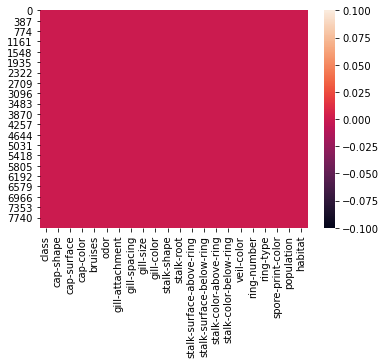

In [19]:
sns.heatmap(df.isnull())

In [20]:
dfcor=df.corr()
dfcor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.112110,-0.169663,0.042028,0.501530,0.582015,-0.129200,-0.348387,-0.540024,0.412869,...,0.552044,0.532452,0.225294,0.098476,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.112110,1.000000,-0.057205,0.001839,0.120509,0.175229,0.040082,-0.043906,-0.151921,0.218627,...,0.079050,0.074161,0.073171,0.056450,-0.029202,0.041268,-0.206430,0.225953,0.028216,0.075377
cap-surface,-0.169663,-0.057205,1.000000,0.016133,-0.047265,-0.106147,-0.186157,0.029686,0.267029,-0.266708,...,0.080111,0.090350,0.080218,0.092631,0.183251,-0.082086,0.175734,-0.321915,0.234649,-0.242914
cap-color,0.042028,0.001839,0.016133,1.000000,-0.065879,0.115960,-0.163457,-0.012795,0.015113,0.023458,...,-0.020976,-0.042124,-0.063978,-0.065686,0.172764,0.144526,0.006661,0.024000,0.032377,-0.004371
bruises,0.501530,0.120509,-0.047265,-0.065879,1.000000,0.588456,0.137359,0.299473,-0.369596,0.325408,...,0.573538,0.530214,0.267325,0.208451,-0.119770,-0.056788,-0.692973,0.285008,-0.088137,0.075095
odor,0.582015,0.175229,-0.106147,0.115960,0.588456,1.000000,-0.016816,-0.155748,-0.444492,0.599497,...,0.394828,0.353683,0.214888,0.101501,0.053743,-0.149395,-0.571389,0.452121,0.190144,0.020987
gill-attachment,-0.129200,0.040082,-0.186157,-0.163457,0.137359,-0.016816,1.000000,-0.071489,0.108984,0.184927,...,-0.087714,-0.100591,0.514289,0.595280,-0.897518,-0.093236,0.146689,0.029524,-0.165575,0.030304
gill-spacing,-0.348387,-0.043906,0.029686,-0.012795,0.299473,-0.155748,-0.071489,1.000000,0.108333,-0.274645,...,-0.054077,-0.112643,-0.309026,-0.233907,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,-0.540024,-0.151921,0.267029,0.015113,-0.369596,-0.444492,0.108984,0.108333,1.000000,-0.518717,...,-0.052806,-0.049072,0.186706,0.226610,-0.103809,0.171362,0.460872,-0.622991,-0.147682,-0.161418
gill-color,0.412869,0.218627,-0.266708,0.023458,0.325408,0.599497,0.184927,-0.274645,-0.518717,1.000000,...,0.154243,0.146393,0.188830,0.115547,-0.163273,-0.032438,-0.464970,0.604582,0.127914,0.131662


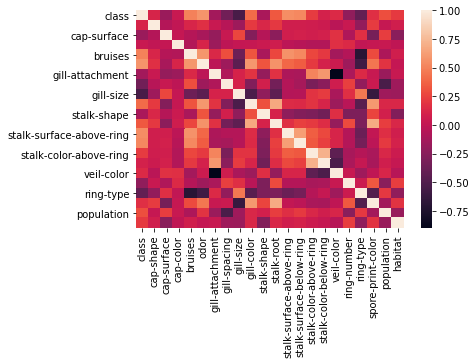

In [21]:
sns.heatmap(dfcor)

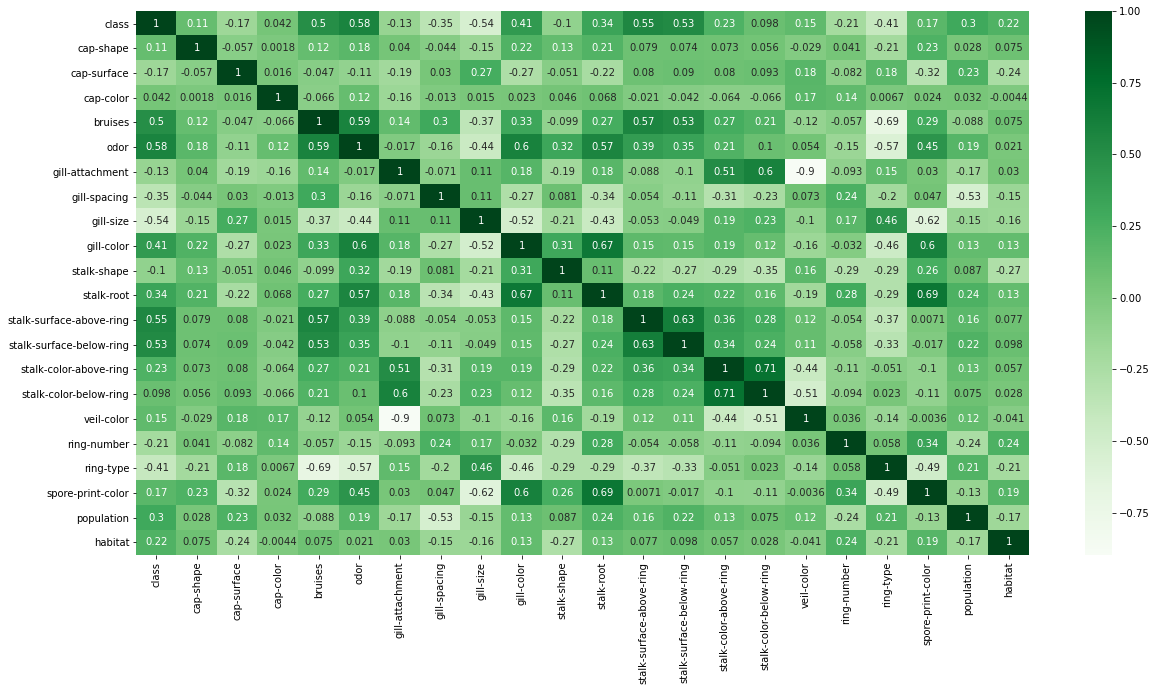

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap="Greens",annot=True)

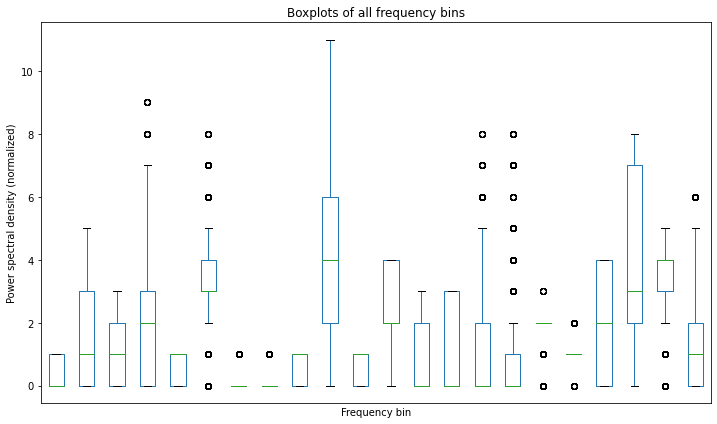

In [25]:
df.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

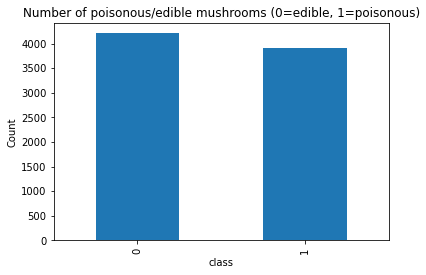

In [26]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

In [27]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

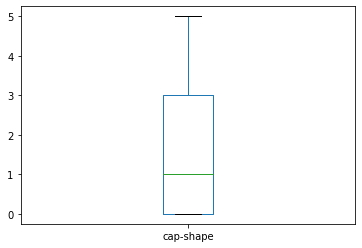

In [29]:
df['cap-shape'].plot.box()

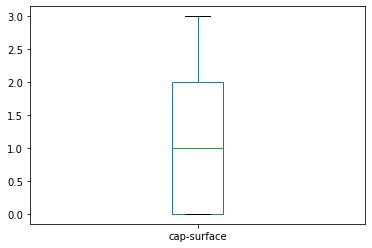

In [30]:
df['cap-surface'].plot.box()

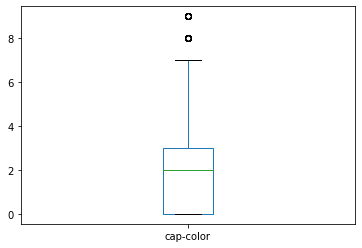

In [31]:
df['cap-color'].plot.box()

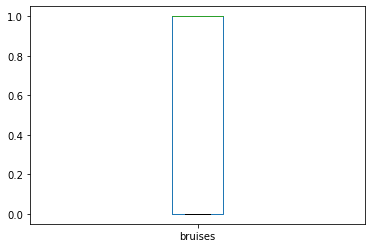

In [32]:
df['bruises'].plot.box()

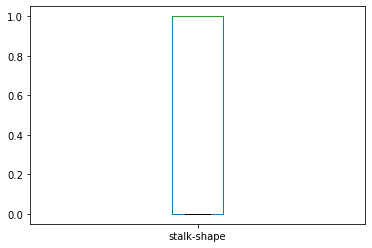

In [33]:
df['stalk-shape'].plot.box()

In [34]:
collist=df.columns.values
ncol=12
nrows=10

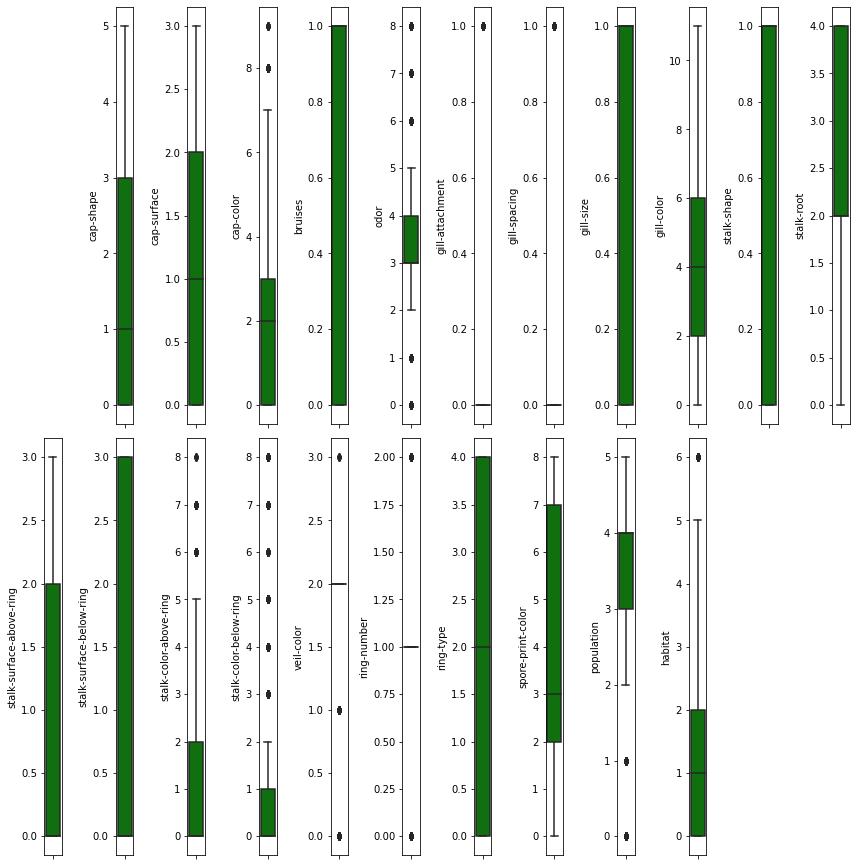

In [35]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

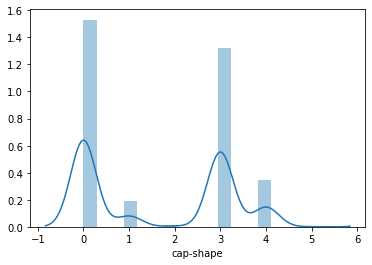

In [36]:
sns.distplot(df['cap-shape'])

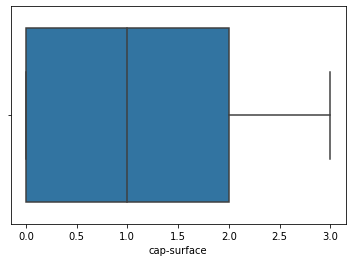

In [37]:
sns.boxplot(df['cap-surface'])

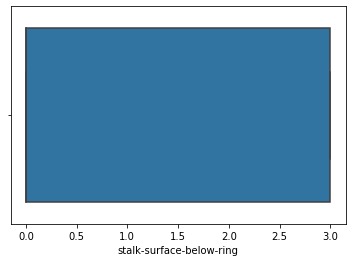

In [38]:
sns.boxplot(df['stalk-surface-below-ring'])

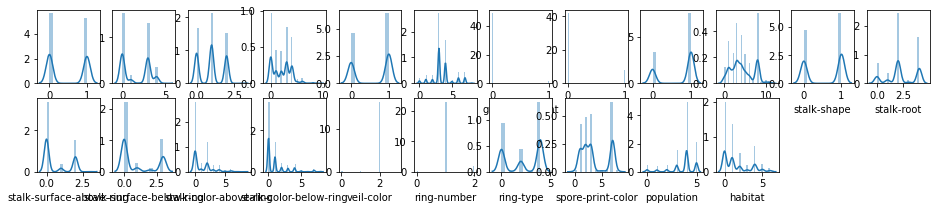

In [39]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [40]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

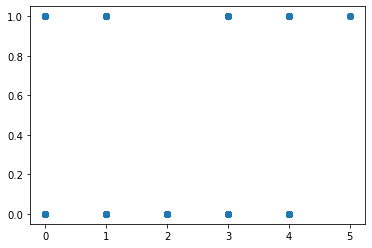

In [41]:
plt.scatter(df['cap-shape'],df['class'])

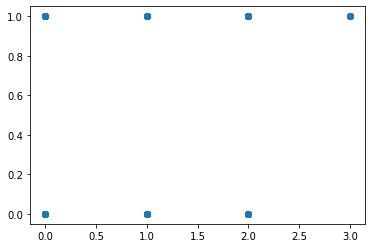

In [42]:
plt.scatter(df['cap-surface'],df['class'])

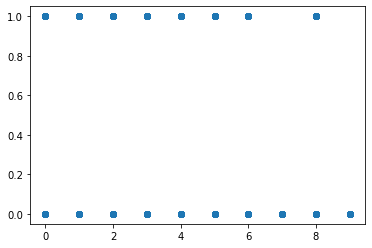

In [43]:
plt.scatter(df['cap-color'],df['class'])

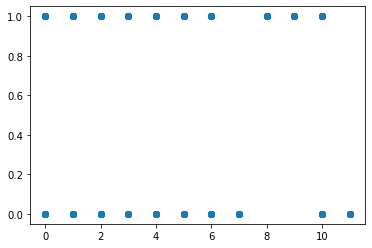

In [44]:
plt.scatter(df['gill-color'],df['class'])

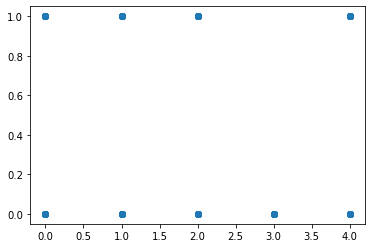

In [45]:
plt.scatter(df['stalk-root'],df['class'])

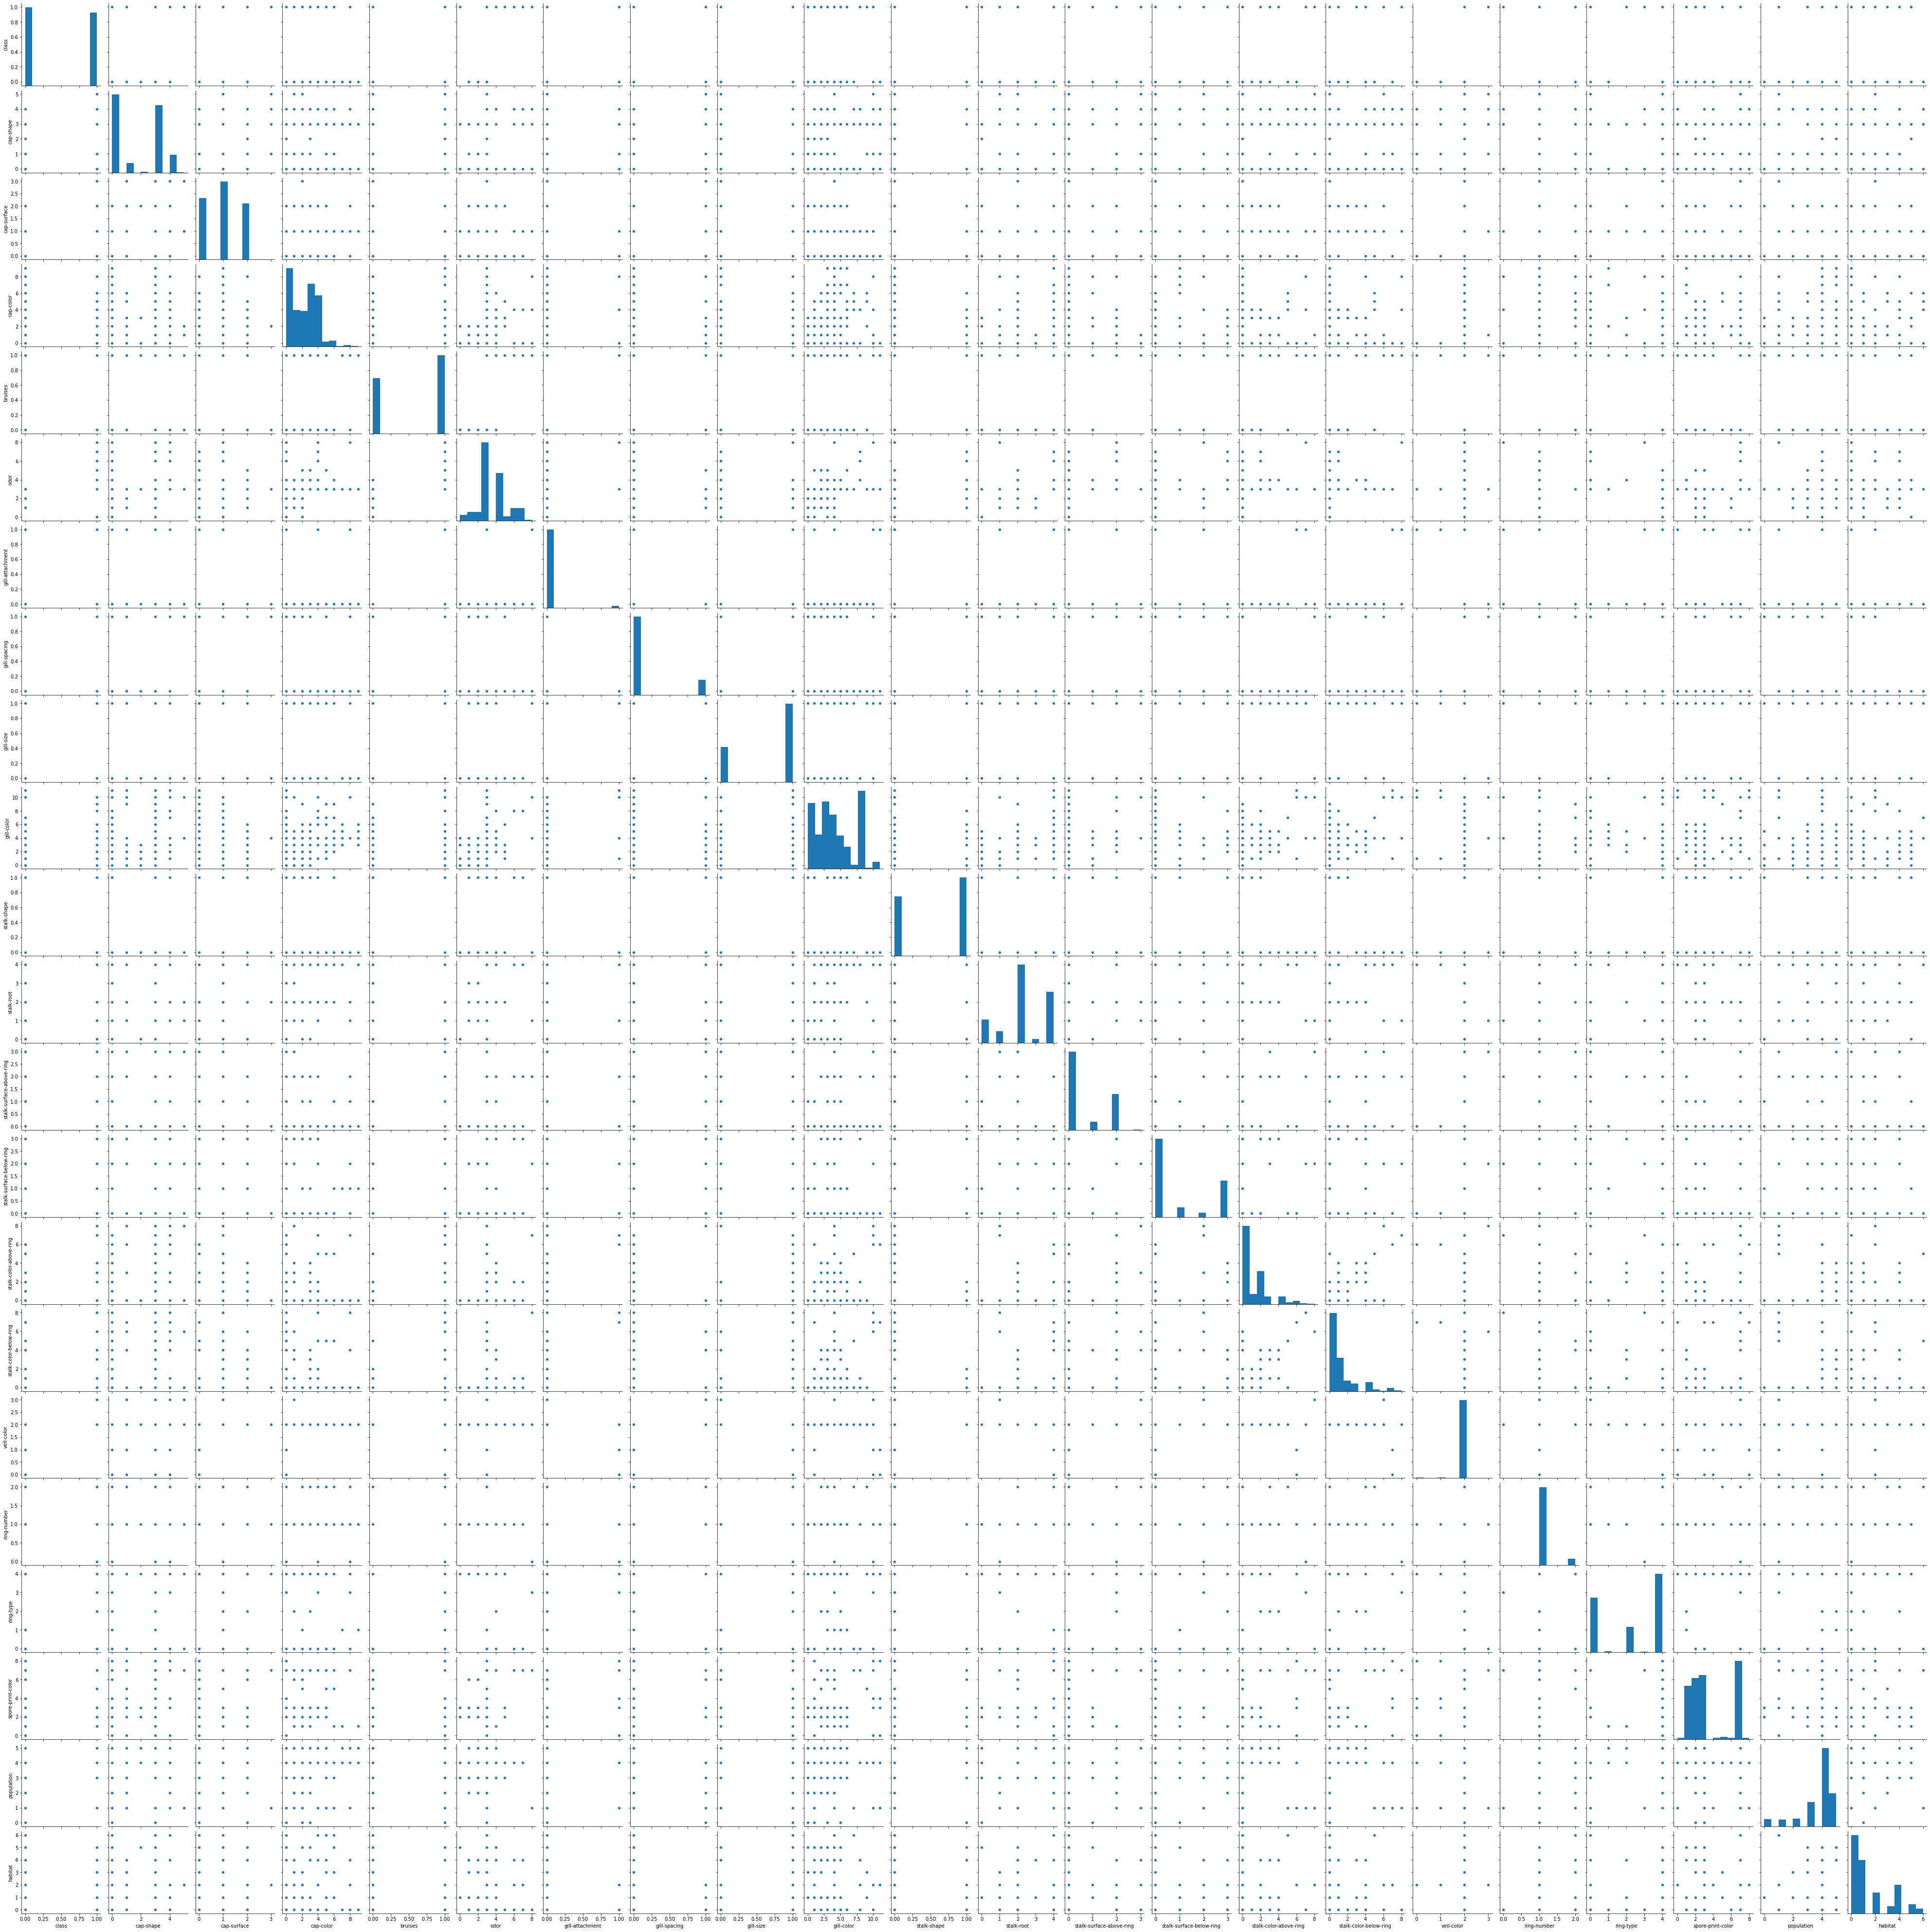

In [46]:
sns.pairplot(df)

# Removing Outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.0366127 , 1.03067919, 1.25332348, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.03067919, 1.25332348, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 0.40130173, 1.25332348, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8574532 , 1.25332348, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 1.48683066, 0.03619019, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.03067919, 1.25332348, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [48]:
threshold=3
print(np.where(z>3))

(array([3984, 4106, 4165, ..., 8123, 8123, 8123], dtype=int64), array([17, 17,  3, ..., 14, 15, 16], dtype=int64))


In [49]:
z[3984][17]

3.4332552519568216

In [50]:
z[4106][17]

3.4332552519568216

In [51]:
z[8123][15]

3.602351526043998

In [52]:
df_new=df[(z<3).all(axis=1)]

In [53]:
df_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,4,2,3,5
1,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,2,1,4,3,2,1
2,0,1,0,2,0,2,0,0,1,1,...,0,0,0,0,2,1,4,3,2,3
3,1,0,1,2,0,0,0,0,0,1,...,0,0,0,0,2,1,4,2,3,5
4,0,0,0,3,1,3,0,1,1,0,...,0,0,0,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,4,1,4,1,6,0,0,0,8,...,2,3,2,1,2,1,0,7,4,0
8116,1,4,1,0,1,7,0,0,0,8,...,0,3,2,0,2,1,0,7,4,2
8117,1,4,0,4,1,6,0,0,0,8,...,2,0,2,0,2,1,0,7,4,0
8118,1,4,1,0,1,4,0,0,0,8,...,2,0,2,0,2,1,0,7,4,0


In [54]:
df.shape

(8124, 22)

In [55]:
df_new.shape

(7248, 22)

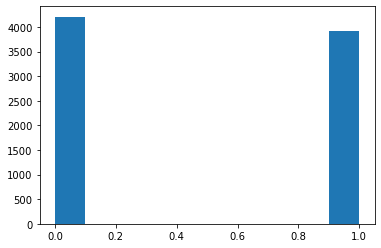

In [56]:
plt.hist(x='class',bins=10,data=df)
plt.show()

In [57]:
df_new.skew()

class                      -0.097265
cap-shape                   0.089776
cap-surface                -0.017771
cap-color                   0.155943
bruises                    -0.303724
odor                        0.268563
gill-attachment             0.000000
gill-spacing                2.113497
gill-size                  -0.675868
gill-color                  0.216787
stalk-shape                -0.564361
stalk-root                 -0.008738
stalk-surface-above-ring    0.675144
stalk-surface-below-ring    0.668825
stalk-color-above-ring      0.878996
stalk-color-below-ring      1.467313
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.215893
spore-print-color           0.813800
population                 -1.796416
habitat                     0.936519
dtype: float64

In [58]:
for col in df.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df[col])

In [59]:
df_new.skew()

class                      -0.097265
cap-shape                   0.089776
cap-surface                -0.017771
cap-color                   0.155943
bruises                    -0.303724
odor                        0.268563
gill-attachment             0.000000
gill-spacing                2.113497
gill-size                  -0.675868
gill-color                  0.216787
stalk-shape                -0.564361
stalk-root                 -0.008738
stalk-surface-above-ring    0.606522
stalk-surface-below-ring    0.555697
stalk-color-above-ring      0.445379
stalk-color-below-ring      0.767029
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.215893
spore-print-color           0.351553
population                 -1.796416
habitat                     0.409733
dtype: float64

In [61]:
x=df_new.drop(['class'],axis=1)
x.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0.000000,0,0,0,...,0.0,0.0,0.0,0.0,2,1,4,1.098612,3,1.791759
1,0,0,1,0,1,0,0.000000,1,0,0,...,0.0,0.0,0.0,0.0,2,1,4,1.386294,2,0.693147
2,1,0,2,0,2,0,0.000000,1,1,0,...,0.0,0.0,0.0,0.0,2,1,4,1.386294,2,1.386294
3,0,1,2,0,0,0,0.000000,0,1,0,...,0.0,0.0,0.0,0.0,2,1,4,1.098612,3,1.791759
4,0,0,3,1,3,0,0.693147,1,0,1,...,0.0,0.0,0.0,0.0,2,1,0,1.386294,0,0.693147


In [62]:
y=df_new.iloc[:,:1]
y.head(5)

,class
0,1
1,0
2,0
3,1
4,0


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scale=StandardScaler()

In [65]:
x=scale.fit_transform(x)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=45)

In [67]:
lg=LogisticRegression()

In [68]:
lg.fit(x_train,y_train)

LogisticRegression()

In [69]:
pred=lg.predict(x_test)
print(pred)

[1 1 1 ... 1 0 1]


In [70]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.9879310344827587


In [71]:
print(confusion_matrix(y_test,pred))

[[806  15]
 [  6 913]]


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       821
           1       0.98      0.99      0.99       919

    accuracy                           0.99      1740
   macro avg       0.99      0.99      0.99      1740
weighted avg       0.99      0.99      0.99      1740



# AUC ROC Curve

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [82]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.99999757, 1.        , 0.97426265, ..., 1.        , 0.05206367,
       0.97607625])

In [87]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [84]:
fpr

array([0.        , 0.        , 0.        , 0.00121803, 0.00121803,
       0.00243605, 0.00243605, 0.00365408, 0.00365408, 0.00487211,
       0.00487211, 0.00852619, 0.00852619, 0.00974421, 0.00974421,
       0.01096224, 0.01096224, 0.01218027, 0.01218027, 0.01583435,
       0.01583435, 0.02801462, 0.02801462, 0.03045067, 0.03045067,
       0.03288672, 0.03288672, 0.03410475, 0.03410475, 0.0365408 ,
       0.0365408 , 1.        ])

In [85]:
tpr

array([0.        , 0.00108814, 0.9749728 , 0.9749728 , 0.97823721,
       0.97823721, 0.98041349, 0.98041349, 0.98476605, 0.98476605,
       0.98585419, 0.98585419, 0.98694233, 0.98694233, 0.98911861,
       0.98911861, 0.99020675, 0.99020675, 0.99129489, 0.99129489,
       0.99347116, 0.99347116, 0.9945593 , 0.9945593 , 0.99564744,
       0.99564744, 0.99782372, 0.99782372, 0.99891186, 0.99891186,
       1.        , 1.        ])

In [86]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 7.65549017e-01, 7.49838060e-01,
       7.39011747e-01, 7.27367869e-01, 7.01885622e-01, 6.98842542e-01,
       6.80152906e-01, 6.75839726e-01, 6.73399425e-01, 6.41857168e-01,
       6.35890943e-01, 6.25663937e-01, 5.91128220e-01, 5.89026283e-01,
       5.83573551e-01, 5.83423406e-01, 5.71122969e-01, 5.65907108e-01,
       5.28714528e-01, 4.23223979e-01, 4.21482897e-01, 4.06623446e-01,
       3.96431658e-01, 3.54248150e-01, 3.36548407e-01, 3.30466831e-01,
       3.21150761e-01, 3.17602507e-01, 3.13378671e-01, 3.38133028e-11])

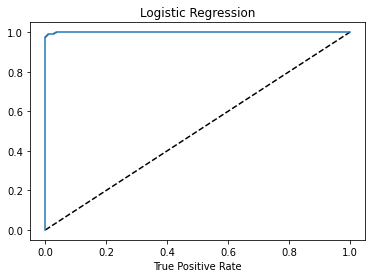

In [88]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [92]:
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)
gbc.score(x_train, y_train)
predgbc=gbc.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

accuracy_score: 1.0
[[821   0]
 [  0 919]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1       1.00      1.00      1.00       919

    accuracy                           1.00      1740
   macro avg       1.00      1.00      1.00      1740
weighted avg       1.00      1.00      1.00      1740



In [74]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [75]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accurecy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accurecy score of LogisticRegression() is:
0.9879310344827587
[[806  15]
 [  6 913]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       821
           1       0.98      0.99      0.99       919

    accuracy                           0.99      1740
   macro avg       0.99      0.99      0.99      1740
weighted avg       0.99      0.99      0.99      1740



Accurecy score of GaussianNB() is:
0.9298850574712644
[[787  34]
 [ 88 831]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       821
           1       0.96      0.90      0.93       919

    accuracy                           0.93      1740
   macro avg       0.93      0.93      0.93      1740
weighted avg       0.93      0.93      0.93      1740



Accurecy score of SVC() is:
1.0
[[821   0]
 [  0 919]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1    

In [76]:
svc=svc=SVC(kernel='rbf')
from sklearn.model_selection import cross_val_score
svcscores=cross_val_score(svc, x , y, cv=5)
y_pred=cross_val_score(svc, x , y, cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.82344828 1.         1.         1.         0.96135266]
0.95696018657338 0.06841345001923387


In [77]:
dtc=DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc, x , y, cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.82344828 1.         1.         1.         0.98343685]
0.9613770257728278 0.06926207973167875


In [78]:
knn=KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn, x , y, cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.82344828 1.         0.99586207 1.         0.96135266]
0.9561326003664835 0.06791098164049057


In [79]:
adbc=AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
adbcscores=cross_val_score(adbc, x , y, cv=5)
print(adbcscores)
print(adbcscores.mean(),adbcscores.std())

[0.82344828 1.         1.         1.         0.98343685]
0.9613770257728278 0.06926207973167875


In [80]:
gbc=GradientBoostingClassifier()
from sklearn.model_selection import cross_val_score
gbcscores=cross_val_score(adbc, x , y, cv=5)
print(gbcscores)
print(gbcscores.mean(),gbcscores.std())

[0.82344828 1.         1.         1.         0.98343685]
0.9613770257728278 0.06926207973167875


In [94]:
import joblib
joblib.dump(gbc, 'gbc_df.pkl')

['gbc_df.pkl']